# LAB 1 - January 22, 2019 'EXPLORING DIGITAL SAMPLING, FOURIER TRANSFORMS, and both DSB and SSB mixers


Lets begin by importing packages

In [2]:
import numpy as np
from matplotlib import pyplot
from astropy import units as u, constants as c
import ugradio
import matplotlib.pyplot as plt
import numpy as np
import cmath
%matplotlib inline
#data1 = ugradio.pico.capture_data('500mV', divisor = 5)
#np.save('data9', data1)

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


This code cell will import all the data that we need for our plotting purposes as well as for when we calculate the DFT, Power and Voltage spectrums.

In [2]:
data1 = np.load('data1.npy')/6.2 -42
data2 = np.load('data2.npy')/6.2 -42
data3 = np.load('data3.npy')/6.2 -42
data4 = np.load('data4.npy')/6.2 -42
data5 = np.load('data5.npy')/6.2 -42
data6 = np.load('data6.npy')/6.2 -42
data7 = np.load('data7.npy')/6.2 -42
data8 = np.load('data8.npy')/6.2 -42
data9 = np.load('data9.npy')/6.2 -42

#data = np.load('all_data.npy')t
data = np.vstack((data1, data2, data3, data4, data5, data6, data7, data8, data9))

Now we can begin by defining a sampling frequency 

Frequency has units of s⁻¹ so to get the time in between measurements we need to take the inverse of the sampling frequency to get how long it takes between successive measurements. from this we can create an array of times

# 4.2 TEST PLOTTING CODE

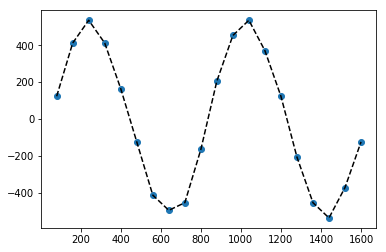

In [3]:
#the actual code to plot the data here I used the first 20 sample times
sampling_frequency = 12.5e6

#in the time_data1 variable I divided the time by 1e⁻9 so that the time 
#in the array is now in nanoseconds
time_data1 = (1/sampling_frequency) * np.arange(1, 1601, 1) * (1/1e-9)

plt.plot(time_data1[:20], data1[:20], 'o')
plt.plot(time_data1[:20], data1[:20], 'k--')

## 4.2 The Nyquist Criterion 

Plotting Data Voltage vs Time.
Given that the sampling frequency is fixed we can use this time between
measurments as constant since all we are changing is the signal frequency
not the sampling frequency we simply take the inverse to find how many
seconds between measurements and multiply it by an array going from 
1 to 16000

TypeError: 'AxesSubplot' object is not iterable

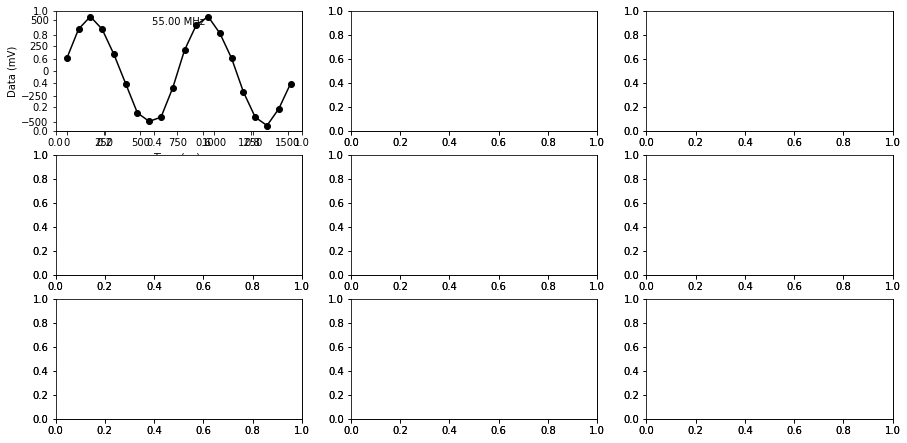

In [4]:
sampling_freq = 12.5e6

#in the time_data1 variable I divided the time by 1e⁻9 so that the time 
#in the array is now in nanoseconds
time = (1/sampling_freq) * np.arange(0, 16001, 1)* (1/1e-9)

def plotting(data):
    
    #fig, axes = plt.figure(figsize = (12,10))
    fig, axes = plt.subplots(3,3, figsize = (15,7.5))
    
    ax1 = fig.add_subplot(331)
    ax2 = fig.add_subplot(332)
    ax3 = fig.add_subplot(333)
    ax4 = fig.add_subplot(334)
    ax5 = fig.add_subplot(335)
    ax6 = fig.add_subplot(336)
    ax7 = fig.add_subplot(337)
    ax8 = fig.add_subplot(338)
    ax9 = fig.add_subplot(339)
    
    ax1.text(.5, .91,'%.2f MHz' %55,horizontalalignment='center',verticalalignment='center',transform=ax1.transAxes)
    #ax1.set_title('Data 1 vs Time', fontsize = 10)
    ax1.set_xlabel('Time (ns) ', fontsize = 10)
    ax1.set_ylabel('Data (mV)', fontsize = 10)
    ax1.plot(time[:20], data[0][:20], 'k-o')
    
    for i, ax in axes.reshape(-1):
        
        ax.plot(time[:20 ],
            data[i][:20],
            color = 'black',
#             label = '%.2f MHz' %freqs_to_test[i].value,
            marker='o',
            markerfacecolor='white',
            markersize = 4,
            linewidth = 1)
    
  
        
        
plotting(data)     

plt.subplots_adjust(hspace=0, wspace = 0)
plt.show()


# 4.3 Fourier Voltage and Power Spectra (5.2, 5.3)


Using the below code cells to work on the fft/dft

Suggestions: make N even(a power of two) I say we can use N = 128

In the documentation for the dft function we need to specify xt which is the function we have in the fourier transform this is eqn. 1 in section 5. I believe all that we have to do is multiply the voltages or electric field by the complex exponential term.

-The time range is another parameter we need to input and for that we need to make an array that has len 32 and make sure to make the starting point (-N/(2v_samp)) to ((N/2)-1)/(v_samp) with N = 128 and v_samp = 12.5MHz

-There is also an output frequency that we have to specify in the function and for that we have to calculate the first N frequencies running from -v_samp/2 to v_samp/2(1-(2/N)). Again here v_samp = 12.5MHz and N = 128


In [5]:
N = 2**7
#print(N)
firstN_data1 = data1[:N]

Making the time array

In [6]:
start_time = -(N/2)/sampling_freq
end_time = ((N/2) - 1)/sampling_freq
time_array = np.linspace(start_time, end_time, num = N)
#print(time_array)

Making the frequency array 

In [7]:
starting_freq = -sampling_freq/2
ending_freq = (sampling_freq/2)*(1-(2/N))
freq_arr = np.linspace(starting_freq, ending_freq, num = N)
#print(freq_arr)

#print(abs(freq_arr[3]- freq_arr[4]))
#print(abs(freq_arr[6]- freq_arr[7]))
#print(sampling_freq/N)


Calculating the xt(complex integrand) in fourier transform 

/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


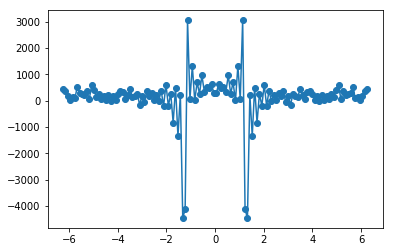

In [8]:
#test
fft_test = ugradio.dft.dft(firstN_data1, t = time_array, f = freq_arr)
#print(fft_test)

plt.plot(fft_test[0]/(1e6), fft_test[1], '-o')

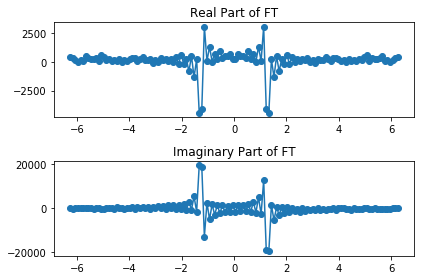

In [9]:
plt.subplot(211)
plt.title('Real Part of FT')
plt.plot(fft_test[0]/1e6, fft_test[1].real, '-o')
plt.subplot(212)
plt.title('Imaginary Part of FT')
plt.plot(fft_test[0]/1e6, fft_test[1].imag, '-o')
plt.tight_layout()

Making Power Spectrum

In [10]:
N = 2**7
#print(N)

start_time = -(N/2)/sampling_freq
end_time = ((N/2) - 1)/sampling_freq
time_array = np.linspace(start_time, end_time, num = N)

starting_freq = -sampling_freq/2
ending_freq = (sampling_freq/2)*(1-(2/N))
freq_arr = np.linspace(starting_freq, ending_freq, num = N)



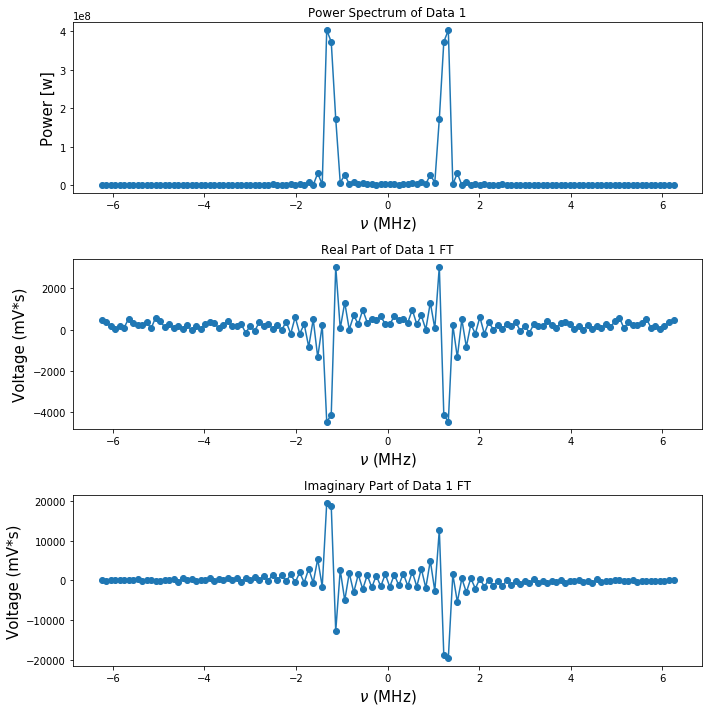

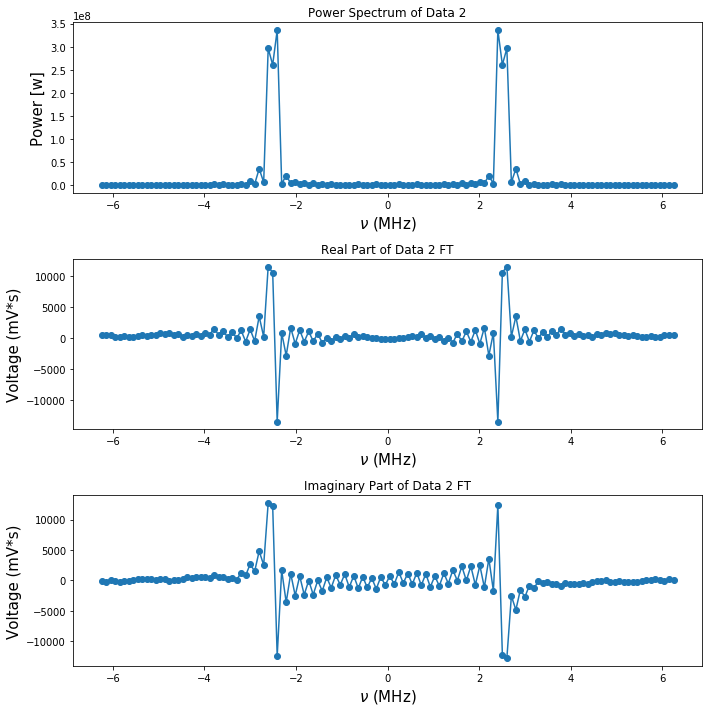

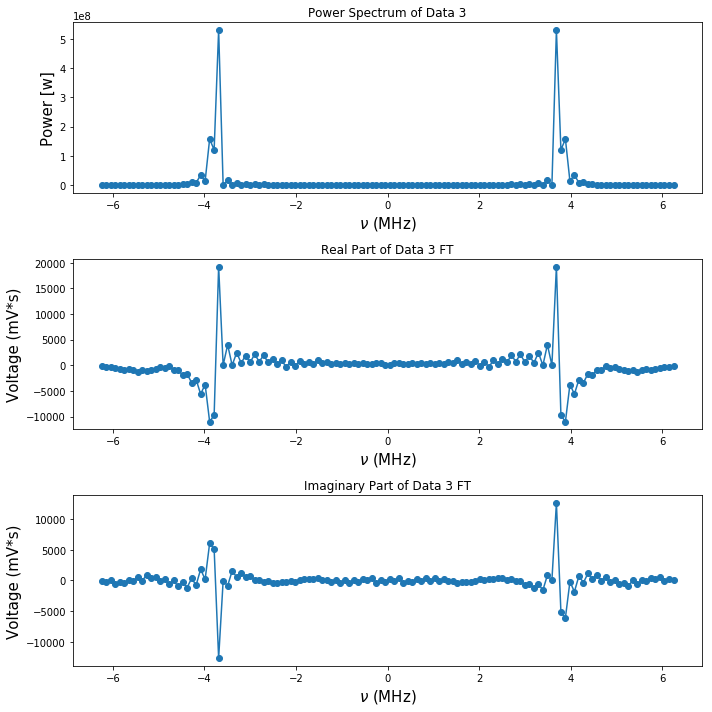

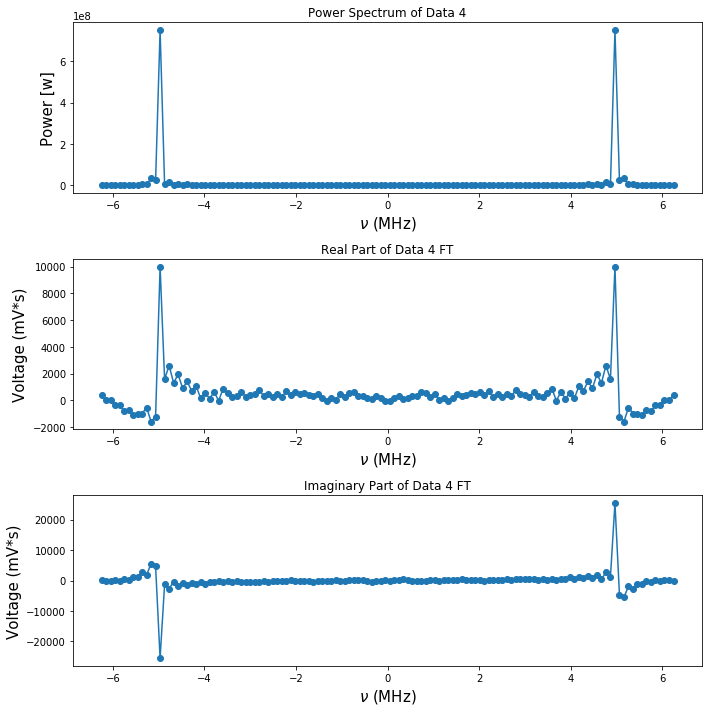

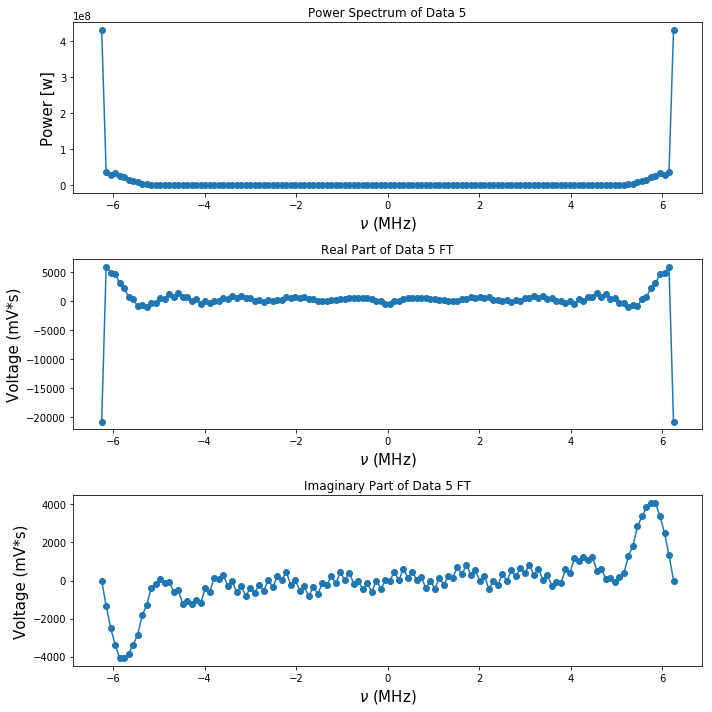

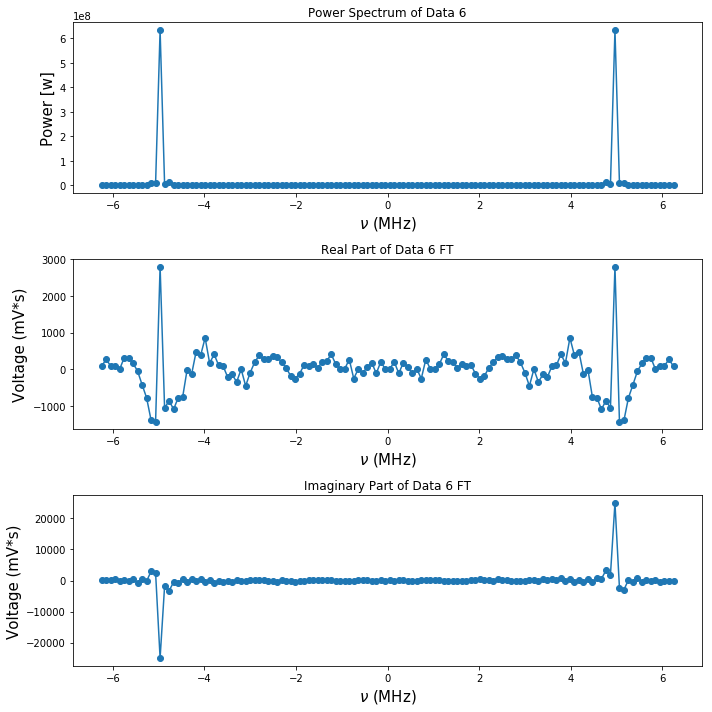

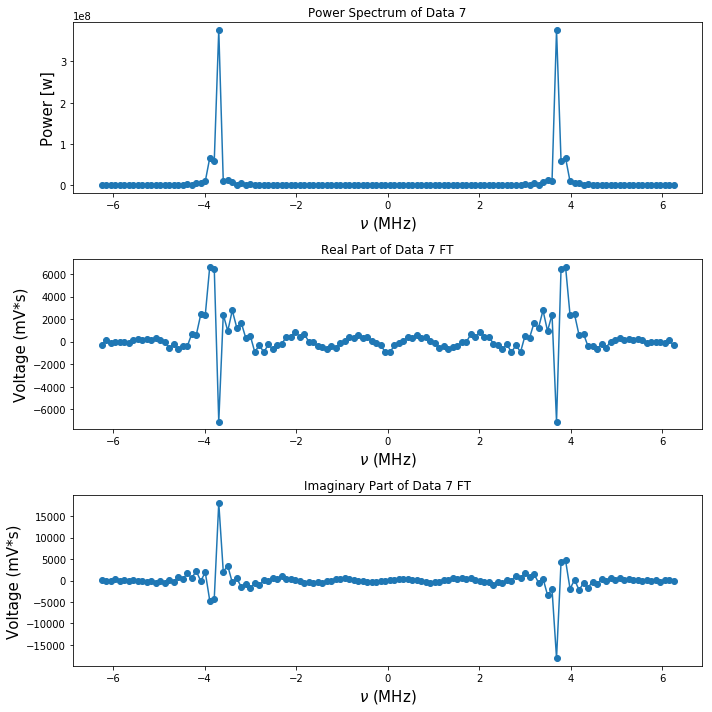

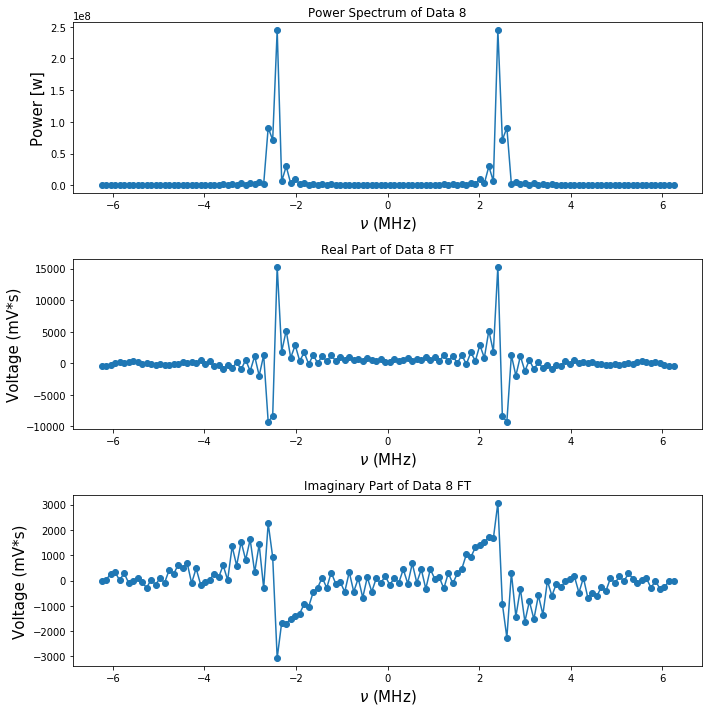

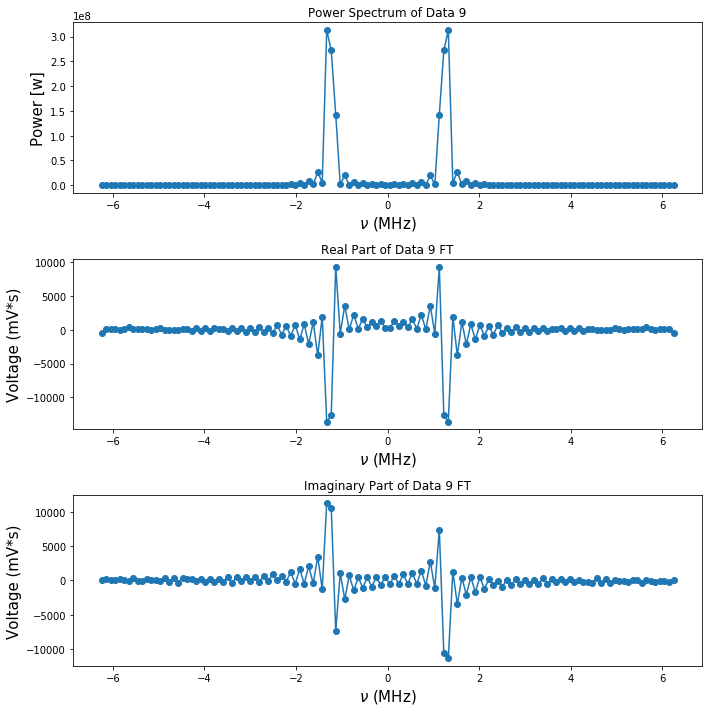

In [11]:
for i in range(9):
    #firstN_data1 = data1[:N]
    fft_data1 = ugradio.dft.dft(data[i][:N], t = time_array, f = freq_arr)

    power_spec = np.abs(fft_data1[1])**2

    fig = plt.figure(figsize = (10,10))
    ax3 = fig.add_subplot(311)
    ax1 = fig.add_subplot(312)
    ax2 = fig.add_subplot(313, sharex = ax1)


    ax3.set_title('Power Spectrum of Data '+ str(i+1))
    ax3.set_ylabel('Power [w]', fontsize = 15)
    ax3.set_xlabel(r'$\nu$ (MHz)', fontsize = 15)
    ax3.plot(fft_data1[0]/1e6, power_spec, '-o')


    ax1.set_title('Real Part of Data '+str(i+1)+' FT')
    ax1.set_xlabel(r'$\nu$ (MHz)', fontsize = 15)
    ax1.set_ylabel('Voltage (mV*s)', fontsize = 15)
    ax1.plot(fft_data1[0]/1e6, fft_data1[1].real, '-o')

    ax2.set_title('Imaginary Part of Data '+ str(i+1)+' FT')
    ax2.set_ylabel('Voltage (mV*s)', fontsize = 15)
    ax2.set_xlabel(r'$\nu$ (MHz)', fontsize = 15)           
    ax2.plot(fft_data1[0]/1e6, fft_data1[1].imag, '-o')

    plt.tight_layout()
plt.show()

# IFFT

2


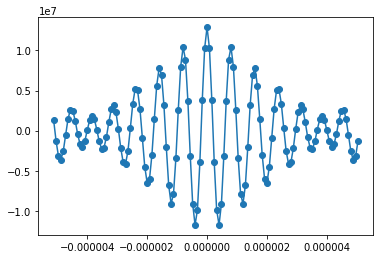

In [12]:
ift = ugradio.dft.idft(power_spec, freq_arr, time_array)
print(len(ift))

plt.plot(ift[0], ift[1], '-o')

# 4.4  LEAKAGE POWER

In [13]:
starting_freq = -sampling_freq/2
ending_freq = (sampling_freq/2) *(1-(2/N))

leakage_freq = np.linspace(starting_freq, ending_freq, num = 2**9)

#print(leakage_freq[7] - leakage_freq[8])
#print(sampling_freq/N)

fft_leakage_data9 = ugradio.dft.dft(firstN_data9, t = time_array, f = leakage_freq)

power_spec = np.abs(fft_leakage_data9[1])**2

plt.plot(fft_leakage_data9[0]/1e6, power_spec)

NameError: name 'firstN_data9' is not defined

# 4.5 Frequency Resolution

# 4.6 Nyquist Window

# 4.7 FTs of Noise

In [5]:
noise1 = ugradio.pico.capture_data('500mV', divisor = 5)
for i in range(32):
    noise = ugradio.pico.capture_data('500mV', divisor = 5)
    np.save('noise' + str(i+1), noise)
    

SyntaxError: invalid syntax (<ipython-input-5-681e0da17799>, line 9)

In [8]:
d1 = np.load('noise1.npy')
d2 = np.load('noise2.npy')
d3 = np.load('noise3.npy')
d4 = np.load('noise4.npy')
d5 = np.load('noise5.npy')
d6 = np.load('noise6.npy')
d7 = np.load('noise7.npy')
d8 = np.load('noise8.npy')
d9 = np.load('noise9.npy')
d10 = np.load('noise10.npy')
d11 = np.load('noise11.npy')
d12 = np.load('noise12.npy')
d13 = np.load('noise13.npy')
d14 = np.load('noise14.npy')
d15 = np.load('noise15.npy')
d16 = np.load('noise16.npy')
d17 = np.load('noise17.npy')
d18 = np.load('noise18.npy')
d19 = np.load('noise19.npy')
d20 = np.load('noise20.npy')
d21 = np.load('noise21.npy')
d22= np.load('noise22.npy')
d23 = np.load('noise23.npy')
d24 = np.load('noise24.npy')
d25 = np.load('noise25.npy')
d26 = np.load('noise26.npy')
d27 = np.load('noise27.npy')
d28 = np.load('noise28.npy')
d29 = np.load('noise29.npy')
d30 = np.load('noise30.npy')
d31 = np.load('noise31.npy')
d32 = np.load('noise32.npy')

noise_data = (d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15,
       d16, d17, d18, d19, d20, d21,d22, d23, d24, d25, d26,d27,d28,d29, 
       d30, d31, d32)

all_noise_data = np.vstack(noise_data)

np.save('all_noise_data', all_noise_data)

(array([   19.,   237.,  1228.,  3226.,  4234.,  3880.,  2283.,   767.,
          120.,     6.]),
 array([-28672. , -22630.4, -16588.8, -10547.2,  -4505.6,   1536. ,
          7577.6,  13619.2,  19660.8,  25702.4,  31744. ]),
 <a list of 10 Patch objects>)

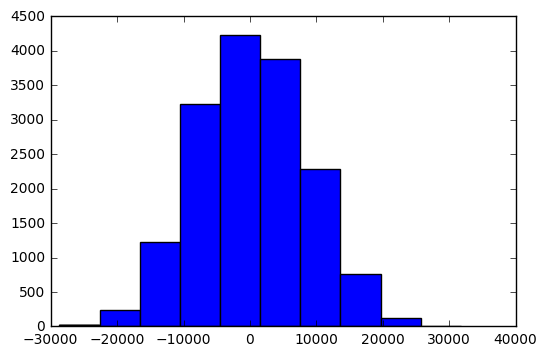

In [3]:
noise1 = ugradio.pico.capture_data('500mV', divisor = 5)
np.save('noise1', noise1)

plt.hist(noise1)

# 5.4  The Power Spectrum and the Autocorrelation Function 

In [ ]:
# here I tried the same thing as above, but noticed that the freq and time
# arrays were optional and omitted them - this is what came out.
ift = ugradio.dft.idft(power_spec)

plt.plot(ift[0], ift[1], '-o')

In [ ]:
correlation = np.correlate(fft_data1[1].real, fft_data1[1].imag, 'full')

#print(correlation)
plt.plot(correlation)

In [ ]:
numpies_fft = np.fft.fft(firstN_data1)
freq = np.fft.fftfreq(freq_arr.shape[-1])
plt.plot(freq, numpies_fft)

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(freq, numpies_fft.real)

ax2 = fig.add_subplot(212)
ax2.plot(freq, numpies_fft.imag)

power_spectra = np.abs(numpies_fft)**2
plt.figure()
plt.plot(freq, power_spectra)


# 5.5 The Fast Fourier Transform

In [ ]:
N = 2**7
numpy_fft = np.fft.fft(data[0][:N])
power = np.abs(numpy_fft)**2
plt.figure(figsize = (8, 8))
plt.plot(power, 'k-o')

fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(numpy_fft.real, '-o')
ax2.plot(numpy_fft.imag, '-o')

plt.tight_layout()

# 6.1 The Double Sideband Mixer

# 6.